 TP  noté 1 Groupe 3B : Les villes de Normandie
 =====

1 - Introduction 
------


L’objectif de ce TP est de faire une synthèse des notions abordées dans les précédents TP.

Le TP sera à réaliser en python 3. Les librairies utilisées sont installées sur les machines de l'université, vous pouvez néanmoins les installer sur vos propres machines à l'aide de l'utilitaire pip présent par défaut avec python.
	
**<span style="color:red"> À part si cela est précisé, vous ne devez pas utiliser directement de boucle (`for`,`while`) ou de branchement conditionnel (`if`) durant ce TP.</span>.**

**<span style="color:red"> 
Ce TP sera noté. Vous rendrez le code que vous avez réalisé en fin de séance sur la plateforme ecampus. N’oubliez pas de mettre votre nom et votre numéro d’étudiant dans les commentaires du fichier. Vous rendrez également un compte-rendu de TP où vous présenterez ce que vous avez fait et répondrez aux questions du TP. Vous mettrez le plus d’images possible pour illustrer vos explications. Ce rapport est à rendre sur ecampus dans un délai d’une semaine. Aucun rendu par mail n’est accepté.</span>**

**<span style="color:blue"> Ce sujet utilise des générateurs aléatoires. Il est donc normal que vous n'obteniez pas exactement les même valeurs que les exemples de résultat donnée.</span>**

In [65]:
import numpy as np
import scipy as sc
import scipy.spatial
import matplotlib.pyplot as plt
import pickle

2 - Chargement et prétraitement des données
---

Lisez le fichier `coord_villes.npy` dans une variable `coord`. Vous aurez les coordonnées des villes de Normandie selon deux axes.

In [66]:
coord = np.load('coord_villes.npy')
print(coord)

[[  -43.56911189 -4160.39162835  4820.12438213]
 [  -31.46683174 -4160.500764    4820.12438213]
 [  -30.2770257  -4163.31316923  4817.70304032]
 ...
 [  123.03601844 -4105.24292174  4865.81940887]
 [  112.28810824 -4105.55096047  4865.81940887]
 [   97.92261372 -4104.50269784  4867.01392983]]


Affichez ces villes en bleu sur une figure. Affichez Carentan(665) en rouge ,et  Caen(4), Alençon (1218), Rouen(2297), Saint-lô(751), Evreux(1712) en couleur "chartreuse".!

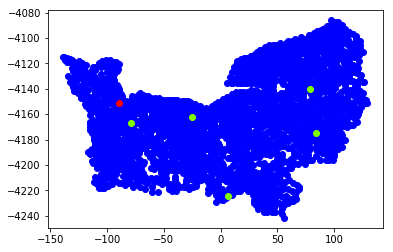

In [67]:
plt.scatter(coord[:,0], coord[:,1], c='b')
plt.scatter(coord[665,0], coord[665,1], c='r')
plt.scatter(coord[4,0], coord[4,1], c='chartreuse')
plt.scatter(coord[1218,0], coord[1218,1], c='chartreuse')
plt.scatter(coord[2297,0], coord[2297,1], c='chartreuse')
plt.scatter(coord[751,0], coord[751,1], c='chartreuse')
plt.scatter(coord[1712,0], coord[1712,1], c='chartreuse')
plt.show()

Calculez la distance euclidienne entre toutes les villes de Normandie. Le résultat sera sous la forme d'une matrice `dist` dont les coordonnées $i,j$ donne la distance entre la ville $i$ et la ville $j$.

In [68]:
dist = sc.spatial.distance.squareform(sc.spatial.distance.pdist(coord))
print(dist.shape)

(2992, 2992)


Carentan est la ville d'indice 665. Récupérez les indices des 50 villes les plus proches de Carentan.!

In [69]:
indice_Carentan = 665

In [70]:
dist_carentan = dist[indice_Carentan]
indice = np.argsort(dist_carentan)

indice_50 = indice[1:51]
dist_50 = dist_carentan[indice_50]

print(indice_50)
print(dist_50)

[ 747  754  666  736  712  662 1020  742  652  680  707  715 1082 1022
 1184  733 1045 1081 1037  915  703 1103  762 1140 1039  739  386 1162
  653 1083  420 1047  748 1050 1034  423 1059 1049  694  981 1053  398
  727  941  706 1024  729  381  997  347]
[ 0.          3.62347857  4.06890556  4.4220113   5.17498478  5.18104586
  5.68627405  5.68653434  6.03917893  6.05949409  6.31579824  6.31775086
  6.63268888  7.47873322  7.5065743   7.5068372   7.79224563  7.79226806
  8.24642689  8.4548063   8.84671275  9.12914921  9.26103549  9.33932747
  9.33933683  9.56100019  9.83690889  9.94354867  9.94578115 10.34535045
 10.35138521 10.36045497 10.36731001 11.02529731 11.14219227 11.48080531
 11.68794569 11.75569204 12.11996301 12.18133367 12.20338768 12.22142862
 12.54477289 12.63748671 12.96553749 12.96553749 13.02180923 13.14907265
 13.28613117 13.28952133]


Définissez les variables `coord_proche_Carentan` et `dist_proche_Carentan` contenant respectivement les coordonnées des 50 villes les plus proches de Carentan et les distances entre toutes ces villes. 

In [71]:
coord_proche_Carentan = coord[indice_50]

dist_proche_Carentan = sc.spatial.distance.squareform(sc.spatial.distance.pdist(coord_proche_Carentan))

print(coord_proche_Carentan.shape)
print(dist_proche_Carentan.shape)


(50, 3)
(50, 50)


Affichez sur une figure les 50 villes les plus proches de Carentan en bleu et la ville de Carentan en rouge.![texte alternatif](Carentan_50voisine.png)


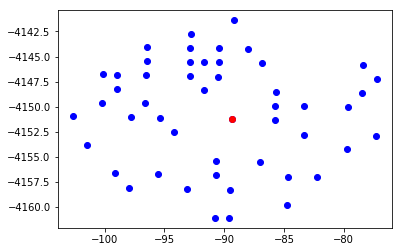

In [72]:
plt.scatter(coord_proche_Carentan[:,0], coord_proche_Carentan[:,1], c='b')
plt.scatter(coord[indice_Carentan,0], coord[indice_Carentan,1], c='r')
plt.show()

3 - Visualition d'un propagation
---

Nous allons dans ce TP visualiser la propagation d'un phénomène entre les villes proches de Carentan.

Tirez 5 entiers entre 0 et 50 non compris que vous placerez dans un tableau nommée `i_villes_src`.
Numéro de villes choisies:  [ 7 37 15 35  4]

In [73]:
i_villes_src = np.random.randint(0,50,5)
print(i_villes_src)

[34 37  1  0 46]


In [1]:
villes_src = np.zeros(50)
v = np.array([7, 37, 15, 35, 4])
villes_src = (villes_src == v)
print(v)

NameError: name 'np' is not defined

Définissez un variable $s$ égale à 4. Vous pourrez changer par la suite cette valeur pour accélérer ou ralentir la propagation.

In [75]:
s=4

In [76]:
villes_choisie_propagation = np.random.standard_normal(dist_proche_Carentan.shape)

print(villes_choisie_propagation.shape)

(50, 50)


Multipliez les valeurs de la matrice `villes_choisie_propagation` par $s$ pour fixer la vitesse de propagation. 

In [77]:
villes_choisie_propagation = villes_choisie_propagation * s

[[ True False  True ... False False False]
 [False  True False ... False False False]
 [False False  True ... False False False]
 ...
 [False False False ...  True False False]
 [False False False ... False  True False]
 [False False False ...  True False  True]]


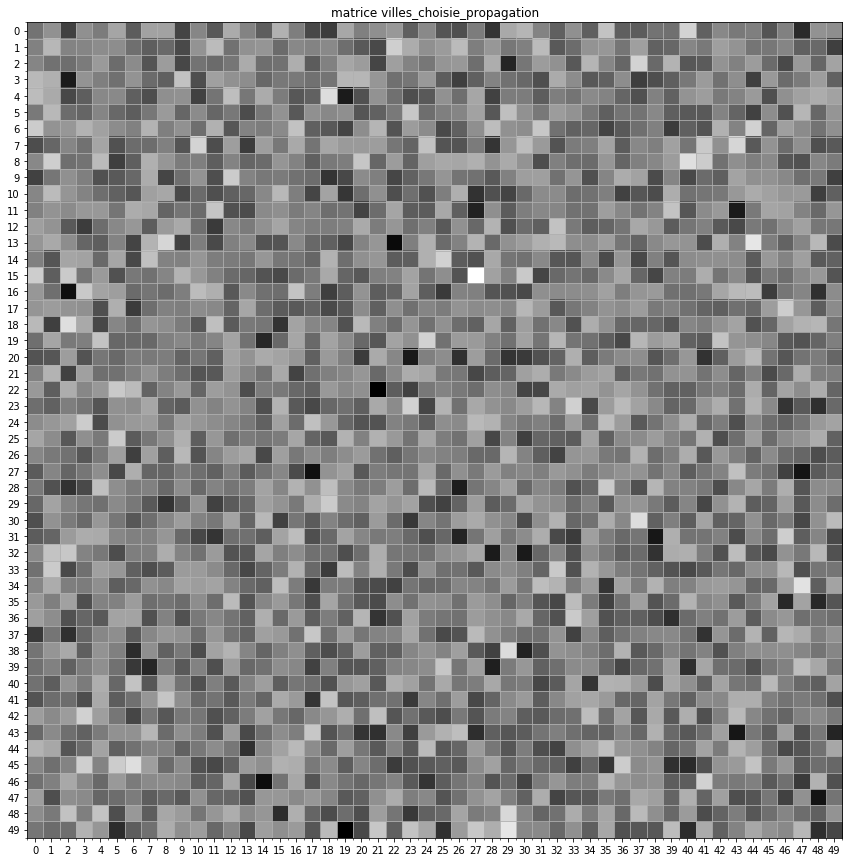

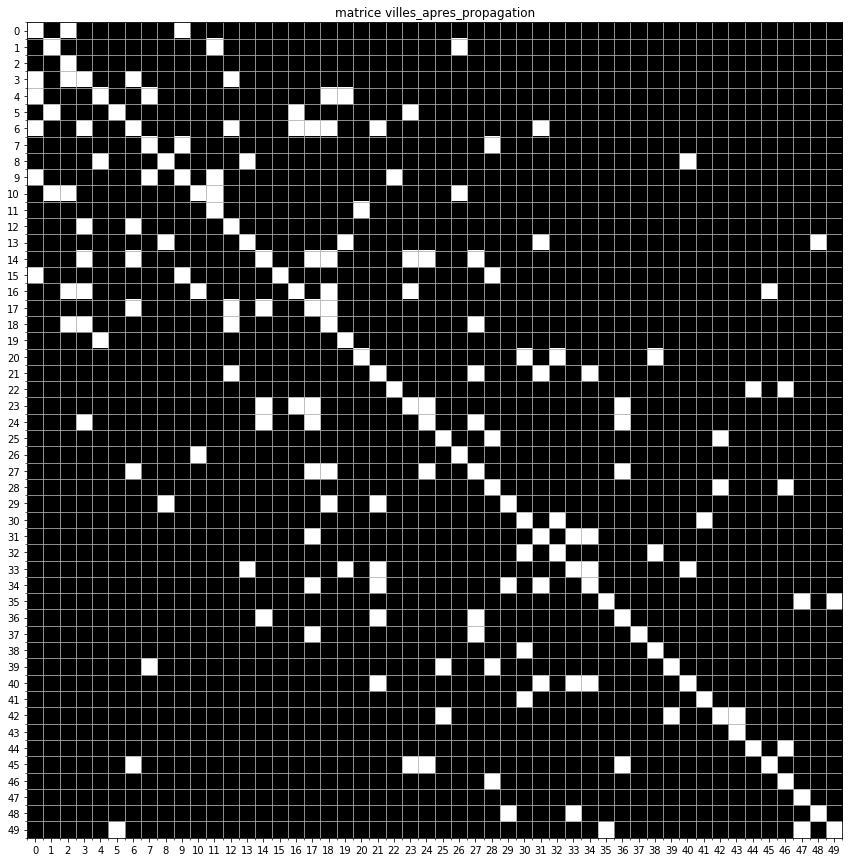

In [81]:
def affichediffusion(villes_apres_propagation,legende):
    plt.figure(figsize=(15,15))
    plt.imshow(villes_apres_propagation,cmap='gray')
    plt.title(legende)
    # Affichage de la grille
    ax = plt.gca()
    ax.set_xticks(np.arange(0, 50))
    ax.set_yticks(np.arange(0, 50))
    ax.set_xticks(np.arange(-.5, 50, 1), minor=True);
    ax.set_yticks(np.arange(-.5, 50, 1), minor=True);
    ax.set_xticklabels(np.arange(50))
    ax.set_yticklabels(np.arange(50))
    plt.grid(which='minor')
    plt.show()
    
villes_apres_propagation = np.abs(villes_choisie_propagation) > dist_proche_Carentan
print(villes_apres_propagation)
affichediffusion(villes_choisie_propagation, 'matrice villes_choisie_propagation')
affichediffusion(villes_apres_propagation, 'matrice villes_apres_propagation')

Déclarez une variable `villes_apres_propagation2` qui est égale `villes_apres_propagation` auquel on soustrait une matrice identité de même dimension.  en utilisant la fonction affichediffusion, afficher la matrice villes_apres_propagation2. ![texte alernatif](3B_villes_apres_propagation2.png)

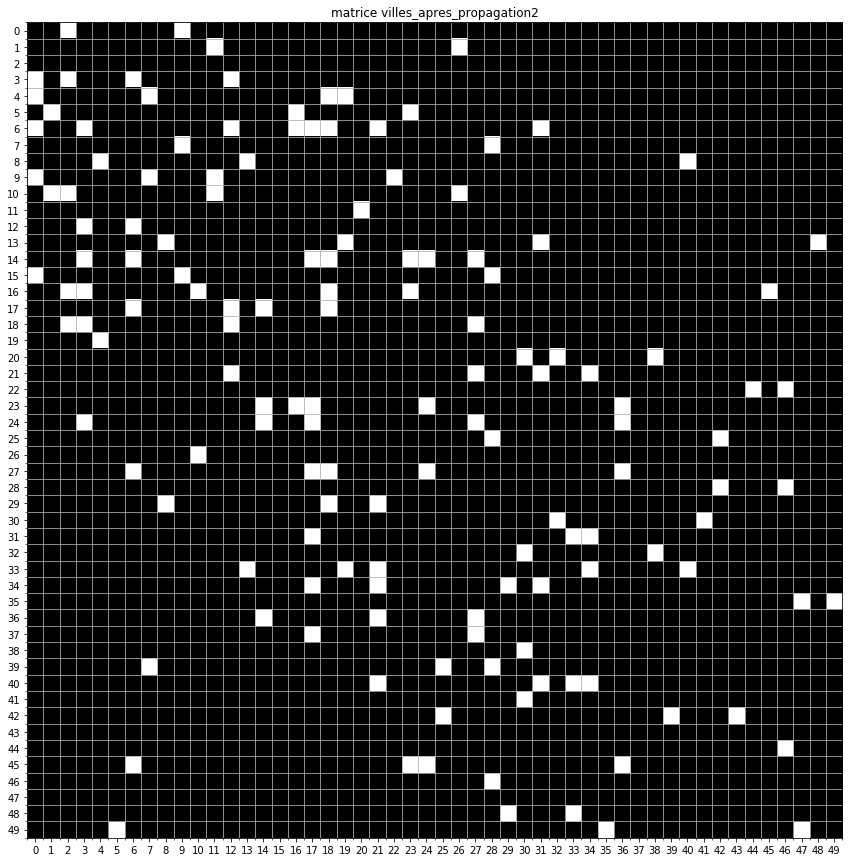

In [79]:
m = np.eye(villes_apres_propagation.shape[0])
villes_apres_propagation2 = villes_apres_propagation - m

affichediffusion(villes_apres_propagation2, 'matrice villes_apres_propagation2')

En utilisant la matrice`ville_src`et `villes_apres_propagation2`, construisez une matrice g semblable à `villes_apres_propagation2` dont seul les lignes correspondant aux villes sources contiennent des valeurs différentes de 0. en utilisant la fonction affichediffusion, afficher la matrice g.![texte alernatif](3B_g.png)

Construisez un vecteur `villes_dest` recensant toutes les villes destinations. Ce vecteur contiendra True aux positions des villes destinations et False pour les autres. Pour répondre, vous utiliserez notamment une sommation bien choisie sur la matrice précédente.

Villes destinations:  [False False False False False False  True False False False False False
  True False False False False  True False False False False False False
  True  True False False  True  True False False  True False False False
 False  True False False  True False False False False False  True False
 False False]


Affichez avec des carrés bleus les 50 villes proches de Carentan, avec des ronds rouges les villes sources et avec des carrés verts les villes destinations. Un affichage qui répond aux contraintes précédentes et qui ne serait pas exactement similaire au rendu du sujet, convient parfaitement. ![texte alernatif](3B_diffusion_1.png)

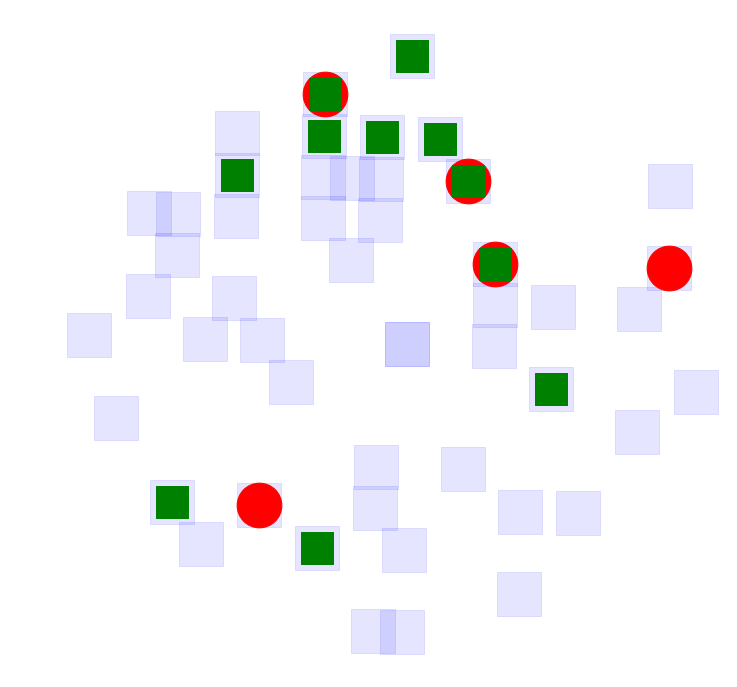

4 - Graphe de propagation
---

L'objectif de cette partie est de visualiser dans quel sens se font les propagations. Nous souhaitons créé un graphe permettant de visualiser avec des flèches les villes sources et destinations de nos propagations. 

Créez un vecteur de valeurs de 0 à 50 non compris que vous nommerez `noeuds`. Ce vecteur liste les numéros de villes.

Créez une matrice de la même taille que `g` indiquant les noeuds sources possible. Vous nommerez cette matrice `a`.

Dimension de a: (50, 50)
Valeurs de a:
 [[ 0  1  2 ..., 47 48 49]
 [ 0  1  2 ..., 47 48 49]
 [ 0  1  2 ..., 47 48 49]
 ..., 
 [ 0  1  2 ..., 47 48 49]
 [ 0  1  2 ..., 47 48 49]
 [ 0  1  2 ..., 47 48 49]]


Dimension de a: (50, 50, 2)
Valeurs de a:
 [[[ 0  0]
  [ 0  1]
  [ 0  2]
  ..., 
  [ 0 47]
  [ 0 48]
  [ 0 49]]

 [[ 1  0]
  [ 1  1]
  [ 1  2]
  ..., 
  [ 1 47]
  [ 1 48]
  [ 1 49]]

 [[ 2  0]
  [ 2  1]
  [ 2  2]
  ..., 
  [ 2 47]
  [ 2 48]
  [ 2 49]]

 ..., 
 [[47  0]
  [47  1]
  [47  2]
  ..., 
  [47 47]
  [47 48]
  [47 49]]

 [[48  0]
  [48  1]
  [48  2]
  ..., 
  [48 47]
  [48 48]
  [48 49]]

 [[49  0]
  [49  1]
  [49  2]
  ..., 
  [49 47]
  [49 48]
  [49 49]]]


Redimensionnez la matrice précédente pour ne garder que les lignes et 2 colonnes. Vous nommerez cette matrice `i_noeuds`.

Dimension de a: (2500, 2)
Valeurs de a:
 [[ 0  0]
 [ 0  1]
 [ 0  2]
 ..., 
 [49 47]
 [49 48]
 [49 49]]


En utilisant la matrice précédente. Faites une liste de tout les propagations. La première colonne indique le numéro de la ville source et la deuxième colonne le numéro de la ville destination. Vous nommerez cette matrice `fleches`.

Dimension de a: (11, 2)
Valeurs de a:
 [[ 6 12]
 [ 6 17]
 [17 24]
 [17 28]
 [17 37]
 [26 29]
 [26 40]
 [37  6]
 [37 25]
 [37 32]
 [37 46]]


A votre avis que fait la fonction suivante ? 

In [40]:
def printGraph(coord,fleches,villes_src):
    plt.figure(figsize=(15,15))
    ax = plt.axes()
        
    ax.axis('equal')
    ax.quiver(coord[fleches[:,0],0], 
              coord[fleches[:,0],1],
              coord[fleches[:,1],0]-coord[fleches[:,0],0],
              coord[fleches[:,1],1]-coord[fleches[:,0],1],
              scale=1.1, units='xy',
              headwidth = 7
    )
    
    ax.scatter(coord[:,0],coord[:,1],s=100)
    ax.scatter(coord[villes_src,0],coord[villes_src,1],s=100,color='r')
    plt.show()

Utilisez la fonction précédente avec les données du TP. ![texte alternatif](3B_diffusion2.png)

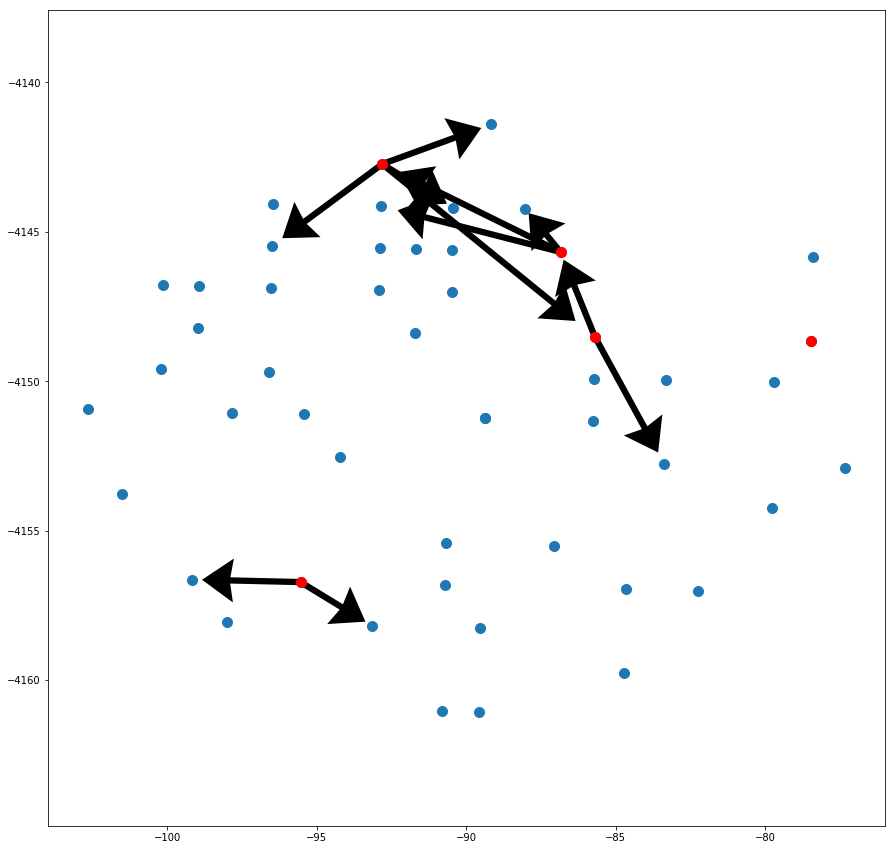

Question bonus: Mixez les deux types d'affichage utilisé dans ce TP pour obtenir l'affichage suivant:

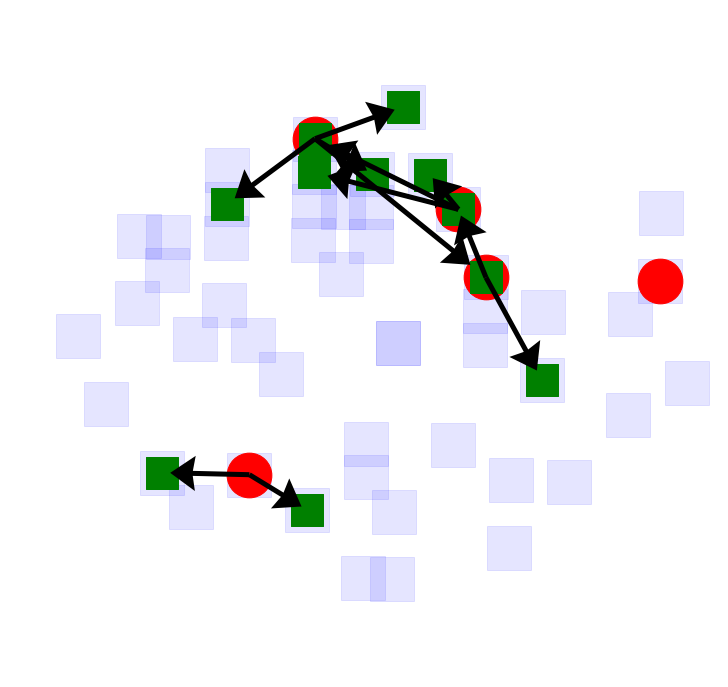